<center><h1>FACE MASK DETECTOR FOR COVID-19</h1></center>

For complete programme open the link 👉🏻 https://github.com/rajeshrishi/advanced-model-of-face-mask-detector-for-covid-19

# Project Overview

<img src="https://raw.githubusercontent.com/rajeshrishi/advanced-model-of-face-mask-detector-for-covid-19/main/download.png" layout="centre">

In this project we have to get a image with the face and apply it to Cascade Classifier which will give me the region of interest of the face. So, it will basically give us x(x-axis), y(y-axis), W(Width),and H(Height) parameters. Then we will get this region of interest which will be resized into 100 X 100 and then we will pass it to a preterained CNN model will will give us a output. In the output we will get P1 (probability of people with mask) and P2 (probability of people with without mask). So, CNN model will predict whether people is wearing mask or not.

# The Dataset

The dataset consisted of 1376 images, 690 face images with masks and 686 without masks. We will use this data set to train our CNN model.
<center><h1>Without Mask</h1></center>

<img src="https://raw.githubusercontent.com/rajeshrishi/advanced-model-of-face-mask-detector-for-covid-19/main/download%20(1).jpg" layout="centre">

<center><h1>With Mask</h1></center>

<img src="https://raw.githubusercontent.com/rajeshrishi/advanced-model-of-face-mask-detector-for-covid-19/main/download%20(2).jpg" layout="centre">

Before training of our CNN model we have to do data preprocessing.


# Data Preprocessing

<img src="https://raw.githubusercontent.com/rajeshrishi/advanced-model-of-face-mask-detector-for-covid-19/main/download%20(1).png" layout="centre">

The data set is consisting of different colours, different sizes, different orientation. In data preprocessing we will convert the image of this data set top a gray scale image and after that we will resize it into 100 X 100 because we need a commonn size for all images before appplying it io a neural network.

In [1]:
# importing OpenCv livrary and operating system library.
import cv2,os

# Giving the path of our data set.
data_path='dataset'

# Loading the folder name.
categories=os.listdir(data_path)

# Creating a label for the number of folders inside the dataset.
labels=[i for i in range(len(categories))]
# So, the resulted label will be something like an array of 0 and 1.

# Creating a dictionary for label dictionary.
label_dict=dict(zip(categories,labels))

print(label_dict)
print(categories)
print(labels)

{'with mask': 0, 'without mask': 1}
['with mask', 'without mask']
[0, 1]


In [2]:
# Declaring the size (100 X 100) of the image.
img_size = 100

# Creating two empty python list (data and target) to save the images
# in data, labels in target.
data = []
target = []

# Going through all the categories.
for category in categories:

    # category is basically the two folders.
    # Creating folder paths for two folders.
    folder_path = os.path.join(data_path, category)

    # Load all the image names from the python list.
    img_names = os.listdir(folder_path)

    # Creating loop to go through each and every image in the folder.
    for img_name in img_names:
        img_path = os.path.join(folder_path, img_name)

        # Load all the images in the image path
        img = cv2.imread(img_path)

        try:

            # Converting the loaded image onto gray scale.
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Resizing the gray scale into 100x100, since we need a
            # fixed common size for all the images in the dataset.
            resized = cv2.resize(gray, (img_size, img_size))

            # Append the resized image to data.
            data.append(resized)

            # Append the label 0 and 1 to target.
            target.append(label_dict[category])

        # We have implemented try and except because sometimes images
        # may not be available and it will through some error.
        except Exception as e:
            print('Exception:', e)
            # So, if any exception rasied, the exception will be
            # printed here and pass to the next image.

In [3]:
import numpy as np

# To normalize the images we divided it by 255 which will convert the
# pixel range into 0 and 1.
data=np.array(data)/255.0

# Reshaping the image into a four dimensional array, since the neural 
# network needs a four dimensional array.
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
# Here 'img_size,1' we have used because it is a gray scale image.

# Converting the target into a numpy array
target=np.array(target)

from keras.utils import np_utils

# Converting the numpy array into categorical representation,
# since the last layer of # neural networks ahas two neurons with
# mask and without mask.
new_target=np_utils.to_categorical(target)

In [4]:
# Save the data and the target
np.save('data',data)
np.save('target',new_target) 
# Data will contain the images and new_target will contain the data 
# of face with mask and without mask.

# Convolutional Neural Network Architecture
<img src="https://raw.githubusercontent.com/rajeshrishi/advanced-model-of-face-mask-detector-for-covid-19/main/download%20(2).png" layout="centre">
This CNN we will use for this model. It has two convonutional 2D neural layers. We will import 100 X 100 pixel image and 1st convonutional 2D neural layers are having 200 kernels of size 3 X 3 and 2nd convonutional 2D neural layers are having 100 kernels of size 3 X 3. Then we will flatten those convolutions. Then finally it will be connected to a dense layer of 50 neurons and at the last there will be output layer of nwo neurons for with mask and without mask.

In [5]:
#loading the save numpy arrays in the previous code

import numpy as np

# Loading the data and target using np.load.
data=np.load('data.npy')
target=np.load('target.npy')

In [6]:
# CNN architecture.
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

# First CNN layer of 200 kernels of size 3 X 3 followed by a Relu 
# layer and MaxPooling layer.
model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# First CNN layer of 100 kernels of size 3 X 3 followed by a Relu 
# layer and MaxPooling layer.
model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Adding the Flatten layer to stack the output convolutions from 
# second convolution layer.
model.add(Flatten())
# Using dropout to get rid of overfitting.
model.add(Dropout(0.5))

#Dense layer of 50 neurons
model.add(Dense(50,activation='relu'))

#The Final layer with two outputs for two categories
model.add(Dense(2,activation='softmax'))

# Compiling the model.
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# Here we have used 'categorical_crossentropy', since we have two 
# categories having with mask and without mask.
# 'metrics=['accuracy']' will print the accuracy while training.

In [7]:
# Splitting the data set into training and testing.
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split
                                            (data,target,test_size=0.1)

In [8]:
# Create a model checkpoint
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',
                                 verbose=0,save_best_only=True,mode='auto')
# Here 'monitor='val_loss'' we are monitoring the validation loss.
# Here 'model-{epoch:03d}.model' we are saving the model for each epoch.
# Here 'save_best_only=True' we are saving the best model.
# If the validation loss gets increase after epoch, it will not be saved.

# Training the model using model.fit.
history=model.fit(train_data,train_target,epochs=40,callbacks=[checkpoint],
                                                     validation_split=0.2)
# 'validation_split=0.2' means we are using 20 % of validation data.
# 'callbacks=[checkpoint]' means after each epoch we callbacks
# to the checkpoint.

Epoch 1/40
94/94 [==============================] - ETA: 0s - loss: 0.5406 - accuracy: 0.7173WARNING:tensorflow:From C:\Users\Rajesh Rishi\anaconda3\lib\site-packages\tensorflow\python\ops\resource_variable_ops.py:1817: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model-001.model\assets
94/94 [==============================] - 161s 2s/step - loss: 0.5406 - accuracy: 0.7173 - val_loss: 0.3743 - val_accuracy: 0.8418
Epoch 2/40
94/94 [==============================] - 170s 2s/step - loss: 0.3250 - accuracy: 0.8665 - val_loss: 0.3061 - val_accuracy: 0.8606
Epoch 3/40
94/94 [==============================] - 177s 2s/step - loss: 0.2552 - accuracy: 0.9007 - val_loss: 0.2157 - val_accuracy: 0.9142
Epoch 4/40
94/94 [==============================] - 177s 2s/step - lo

Here we can see model is trained for 40 epochs and the 26th epoch is better because the validation loss is less and accuracy is more.

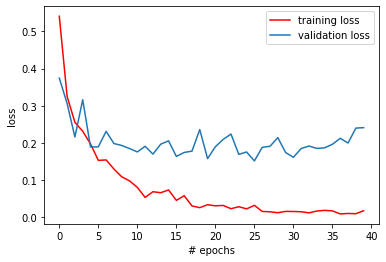

In [9]:
# Plotting the graph for loss

from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

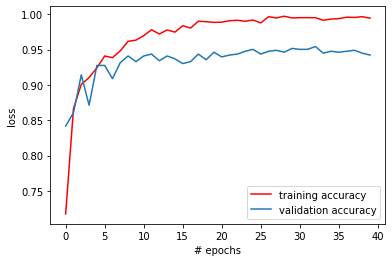

In [10]:
# Plotting the graph for Accuracy 

plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [11]:
# Evaluating the model
print(model.evaluate(test_data,test_target))

13/13 [==============================] - 6s 424ms/step - loss: 0.4465 - accuracy: 0.9277
[0.44649893045425415, 0.9277108311653137]


Accuracy is 92.7 % .

# Detecting Faces with and without masks
<img src="https://raw.githubusercontent.com/rajeshrishi/advanced-model-of-face-mask-detector-for-covid-19/main/download%20(3).png" layout="centre">

In [12]:
from keras.models import load_model
import cv2
import numpy as np

In [13]:
# Loading the model 'model-026.model' as it is the best model.
model = load_model('model-026.model')

# Loading Cascade Classifier
face_clsfr = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Using our webcam for videocapture
source = cv2.VideoCapture(0)

# Creating dictionary to label the bounding rectangle as
# mask or without mask during detection.
labels_dict = {0: 'MASK', 1: 'NO MASK'}

# Drawing bounding rectangle.
color_dict = {0: (0, 255, 0), 1: (0, 0, 255)}
# This code'(0, 255, 0)' will draw bounding rectangle with green 
# color for with mask.
# This code'(0, 0, 255)' will draw bounding rectangle with red 
# color for without mask.

In [14]:
# Creating an infinite loop.
while(True):

    # Reading frame by frame the camera and get this frame as a image.
    ret,img=source.read()
    
    # Converting the image into gray.
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    # Detecting faces.
    faces=face_clsfr.detectMultiScale(gray,1.3,5)  

    for x,y,w,h in faces:
    
        # Cropping the region of interest for each and every 
        # gray image. 
        face_img=gray[y:y+w,x:x+w]
        
        # Resizing the cropped image into 100x100, since we need a
        # fixed common size for all the images in the dataset.
        resized=cv2.resize(face_img,(100,100))
        
        # To normalize the images we divided it by 255 which will 
        # convert the pixel range into 0 and 1.
        normalized=resized/255.0
        
        # Reshaping the image into a four dimensional array, since the 
        # neural network needs a four dimensional array.
        reshaped=np.reshape(normalized,(1,100,100,1))
        
        # Passing the reshaped image into the model for prediction.
        result=model.predict(reshaped)
        # The result will give the probability of P1 and P2.
        # Result will have one row and two columns.
        
        # Using argmax to get the column number
        label=np.argmax(result,axis=1)[0]
      
        # Creating bounding rectangle in the face detector.
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        
        # Creating filled rectangle on the top of the bounding 
        # rectangle.
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        
        # Using 'putText' command to show label.
        cv2.putText(img, labels_dict[label], 
                (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
    # Showing the live image in one frame.   
    cv2.imshow('LIVE',img)
    
    # Waiting for one milli second. 
    key=cv2.waitKey(1)
    
    # If we press 'Esc' key, the loop will break.
    if(key==27):
        break

# Destroying the detecting window after pressing 'Esc' key.
cv2.destroyAllWindows()
source.release()

<img src="https://raw.githubusercontent.com/rajeshrishi/advanced-model-of-face-mask-detector-for-covid-19/main/download%20(4).png" layout="centre">

OUTPUT :- 

<img src="https://raw.githubusercontent.com/rajeshrishi/advanced-model-of-face-mask-detector-for-covid-19/main/OUTPUT%20(2).jpg" layout="centre">

<img src="https://raw.githubusercontent.com/rajeshrishi/advanced-model-of-face-mask-detector-for-covid-19/main/OUTPUT%20(1).jpg" layout="centre">